In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff

In [51]:
from statsmodels.tsa.arima.model import ARIMA

In [41]:
import matplotlib.pyplot as plt

In [35]:
repo=pd.read_csv("FDI_repo_nw.csv")

In [39]:
repo=pd.DataFrame(repo)
repo.head()

,Date,Average Frequency
0,01-Oct-24,49.99
1,02-Oct-24,50.02
2,03-Oct-24,50.01
3,04-Oct-24,50.01
4,05-Oct-24,49.97


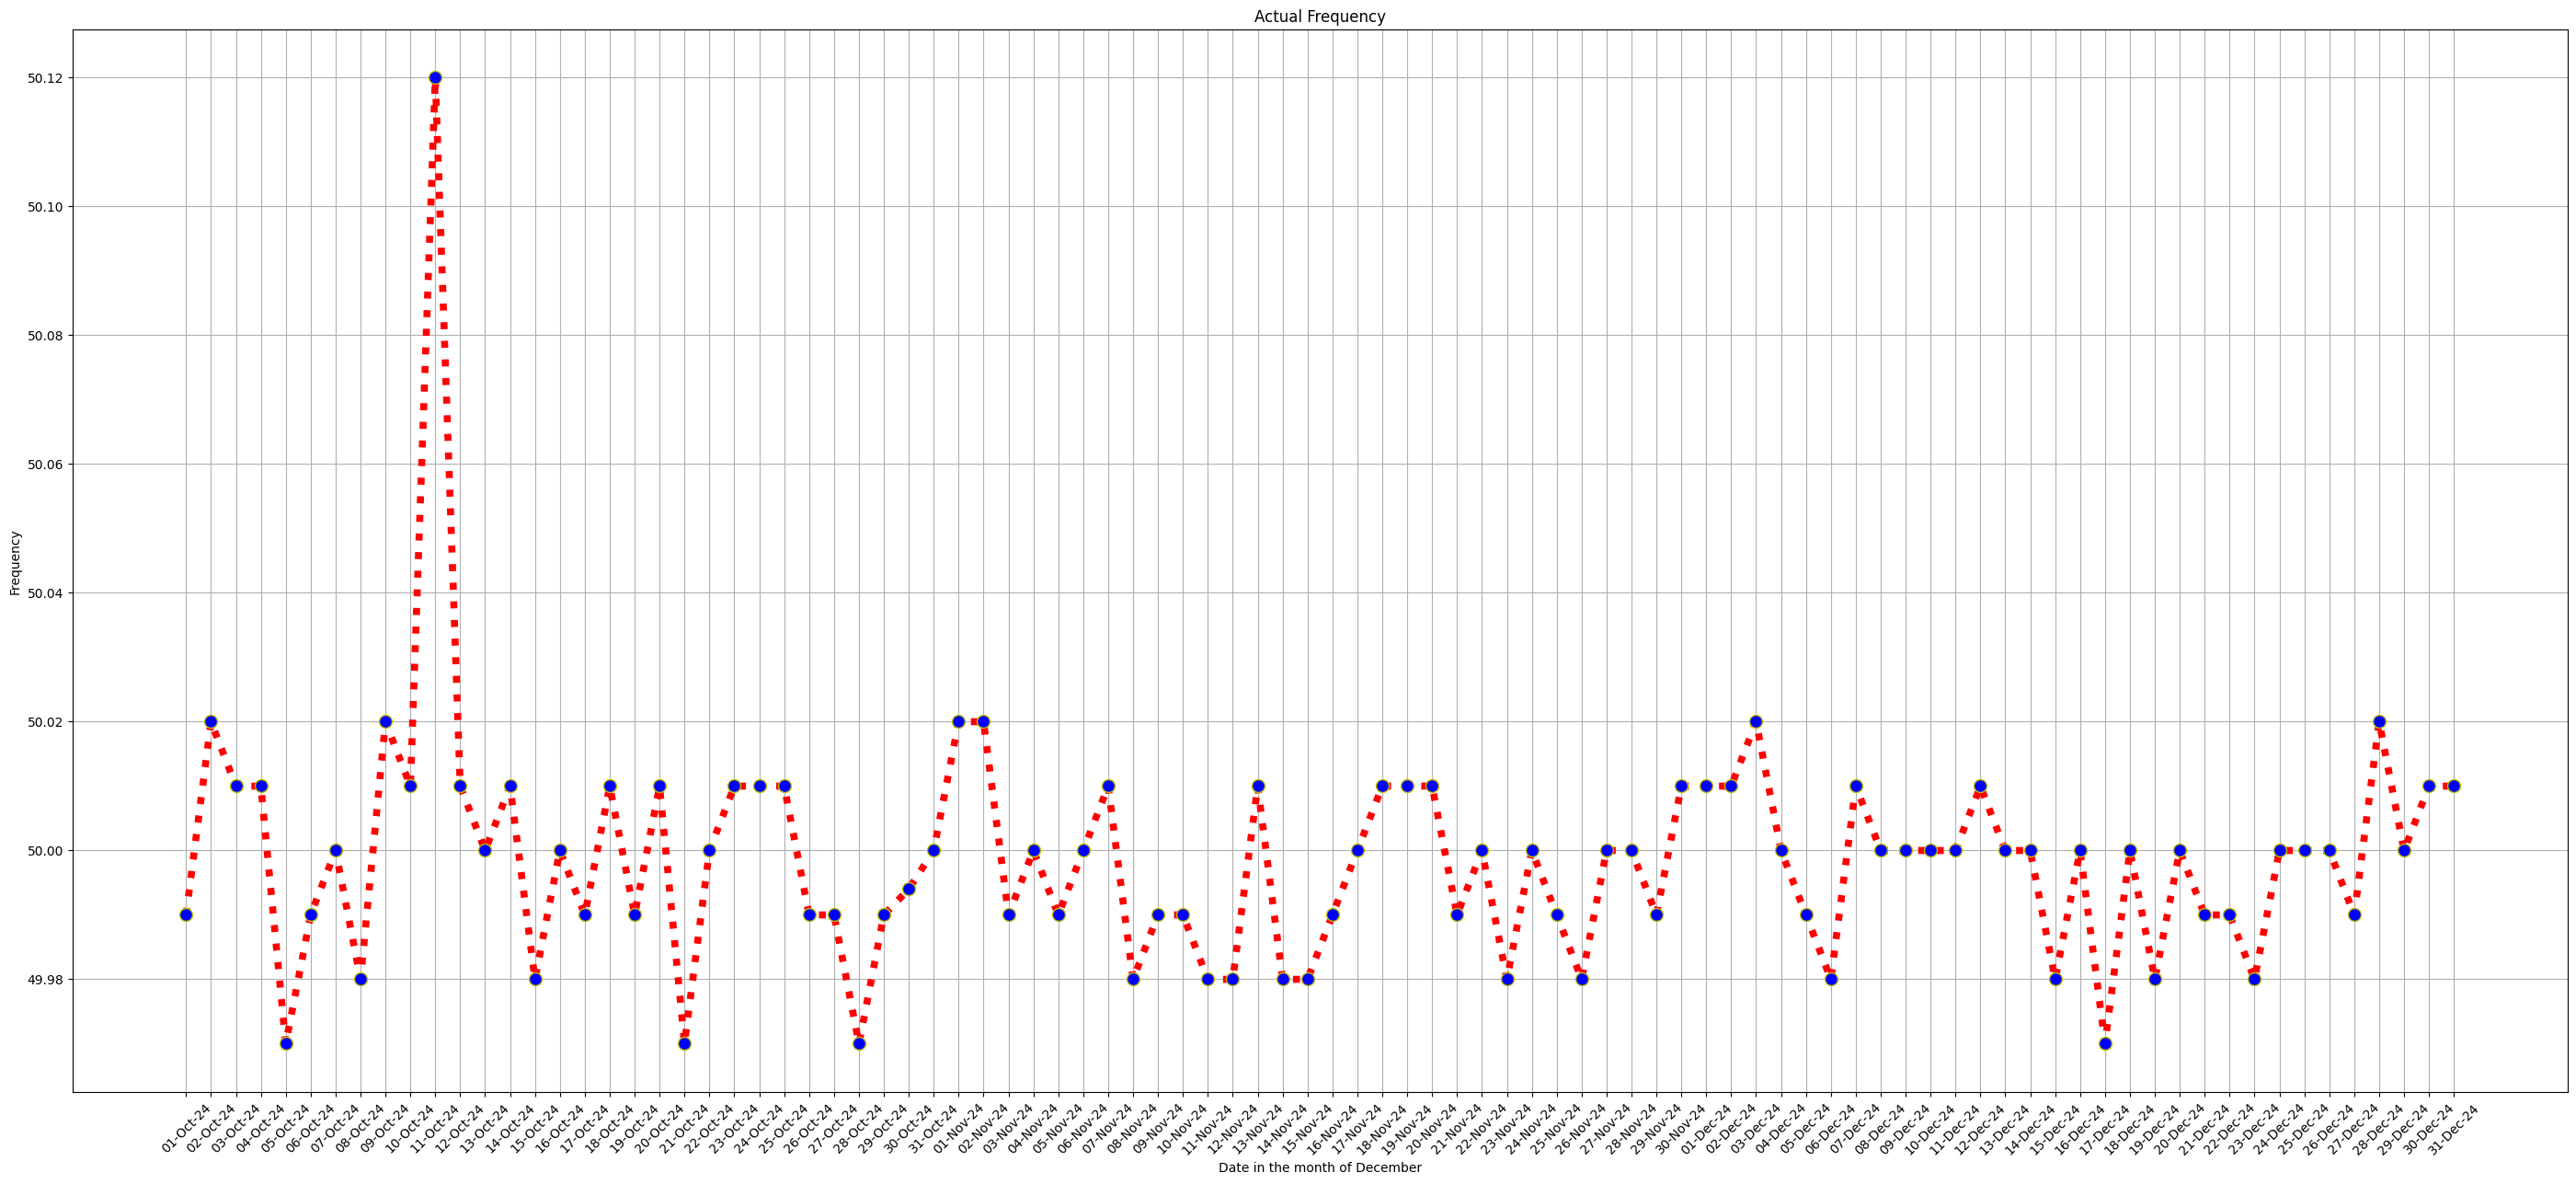

In [48]:
plt.figure(figsize=(35,15))
plt.xticks(rotation=45)
plt.grid()
plt.title("Actual Frequency")
plt.plot(repo['Date'], repo['Average Frequency'] ,'o:r', mec='y', mfc='b', linewidth= '5.5', ms='10')
plt.xlabel("Date in the month of December")
plt.ylabel("Frequency")
plt.show()

In [50]:
repo_diff = diff(repo['Average Frequency'], k_diff=1)

Identification

In [85]:
adf_result_prv = adfuller(repo['Average Frequency'])
print("With the original Data\n")
if adf_result_prv[1] > 0.05:
    print("The data is non-stationary, you might need to difference it (d!=0).\n")
else:
    print("The data is stationary.\n")
#after 1st diff
adf_result_lst = adfuller(repo_diff)
print("After differencing of 1 is performed\n")
if adf_result_lst[1] > 0.05:
    print("The data is non-stationary, you might need to difference it (d!=0).\n")
else:
    print("The data is stationary.\n")

# model = ARIMA(repo['Average Frequency (Hz)'], order=(5,1,1))
model_tst=ARIMA(repo['Average Frequency'][:40], order=(9,1,1))
model_fit = model_tst.fit()
# model_fit= model_tst.fit()

With the original Data

The data is stationary.

After differencing of 1 is performed

The data is stationary.



C:\Users\kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [86]:
predict_vl=model_fit.forecast(steps=51)
print(predict_vl)

40    49.994900
41    49.998574
42    49.996106
43    49.993697
44    49.997092
45    49.994015
46    49.996671
47    49.990712
48    49.993596
49    49.995231
50    49.994955
51    49.996382
52    49.994056
53    49.995830
54    49.994011
55    49.994468
56    49.993920
57    49.994053
58    49.995343
59    49.994592
60    49.995471
61    49.994519
62    49.994819
63    49.994482
64    49.994266
65    49.994654
66    49.994407
67    49.995028
68    49.994700
69    49.994888
70    49.994687
71    49.994550
72    49.994644
73    49.994447
74    49.994722
75    49.994620
76    49.994792
77    49.994737
78    49.994683
79    49.994697
80    49.994568
81    49.994662
82    49.994594
83    49.994689
84    49.994690
85    49.994696
86    49.994713
87    49.994647
88    49.994674
89    49.994623
90    49.994658
Name: predicted_mean, dtype: float64


In [87]:
print(repo[40:91])

         Date  Average Frequency
40  10-Nov-24              49.99
41  11-Nov-24              49.98
42  12-Nov-24              49.98
43  13-Nov-24              50.01
44  14-Nov-24              49.98
45  15-Nov-24              49.98
46  16-Nov-24              49.99
47  17-Nov-24              50.00
48  18-Nov-24              50.01
49  19-Nov-24              50.01
50  20-Nov-24              50.01
51  21-Nov-24              49.99
52  22-Nov-24              50.00
53  23-Nov-24              49.98
54  24-Nov-24              50.00
55  25-Nov-24              49.99
56  26-Nov-24              49.98
57  27-Nov-24              50.00
58  28-Nov-24              50.00
59  29-Nov-24              49.99
60  30-Nov-24              50.01
61  01-Dec-24              50.01
62  02-Dec-24              50.01
63  03-Dec-24              50.02
64  04-Dec-24              50.00
65  05-Dec-24              49.99
66  06-Dec-24              49.98
67  07-Dec-24              50.01
68  08-Dec-24              50.00
69  09-Dec

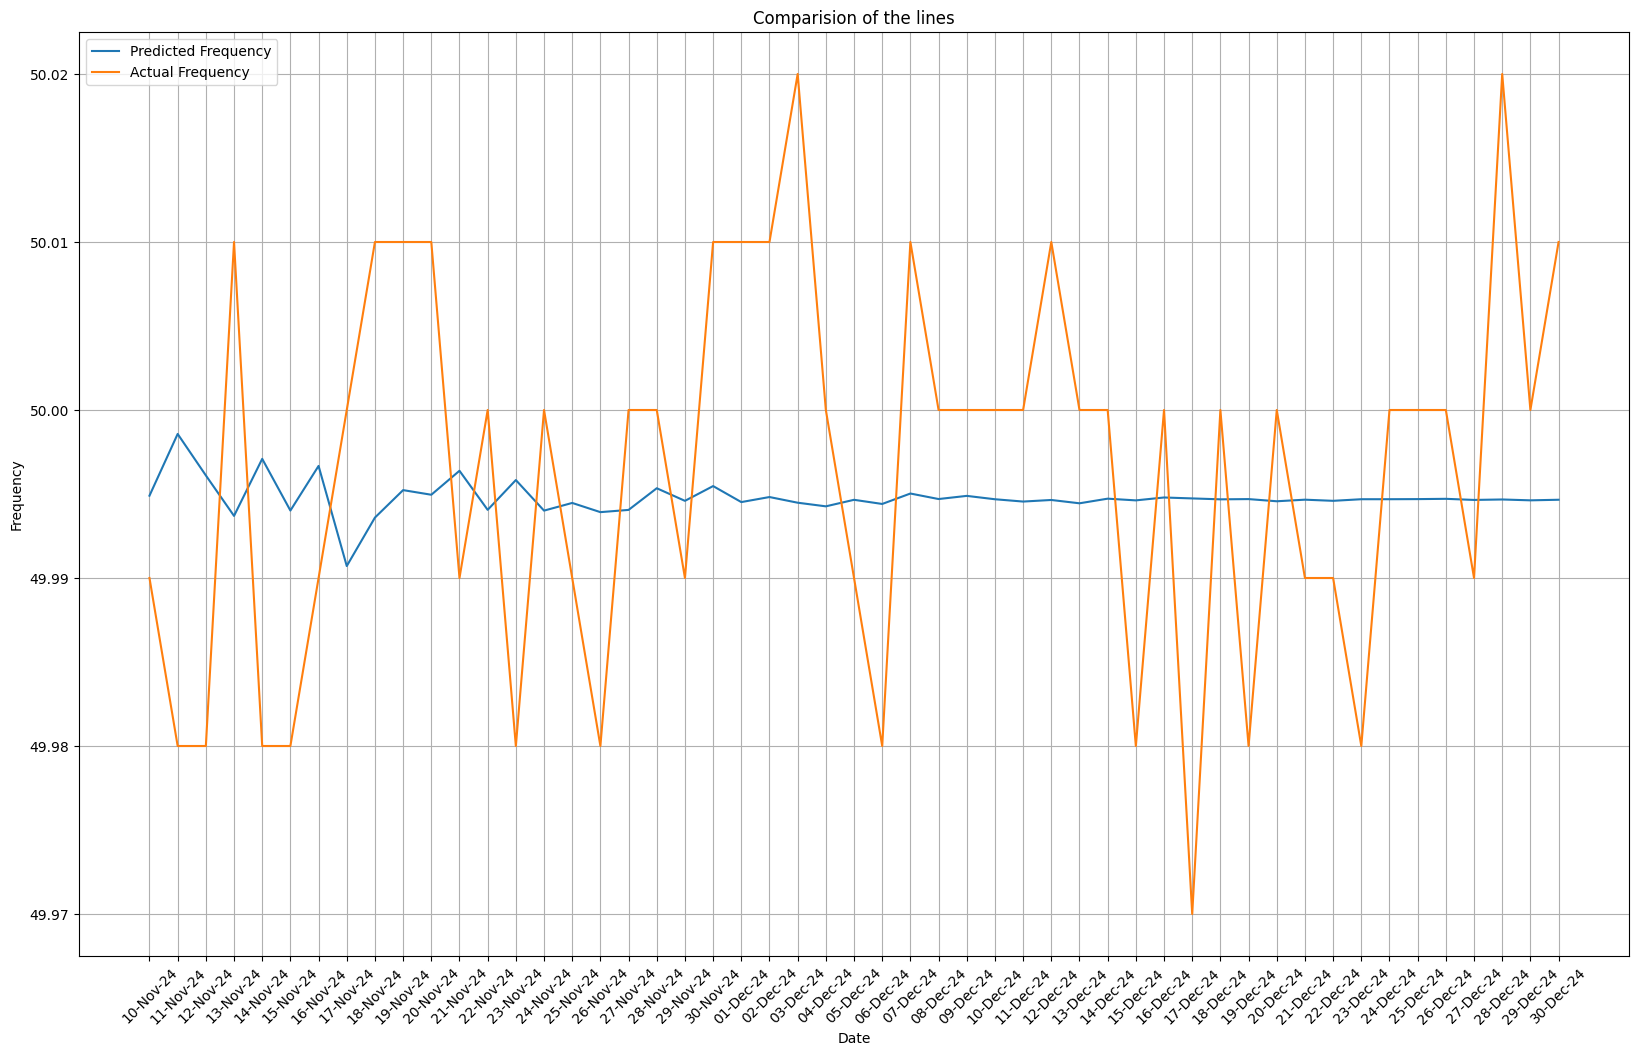

In [88]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=45)
plt.plot(repo['Date'][40:91], predict_vl, label="Predicted Frequency")
plt.plot(repo['Date'][40:91],repo['Average Frequency'][40:91], label="Actual Frequency")
plt.title("Comparision of the lines")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

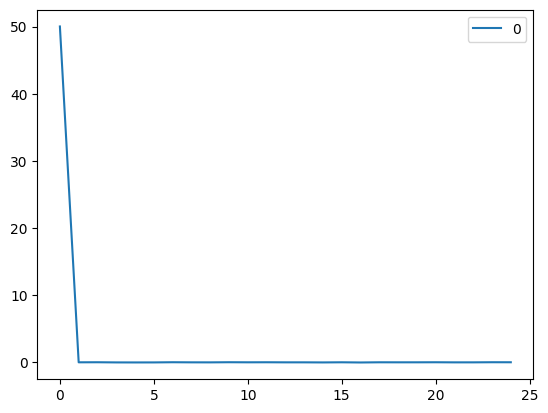

In [89]:
residuals = pd.DataFrame(model_fit_tst.resid)
residuals.plot()
plt.legend()
plt.show()

In [90]:
mse = mean_squared_error(repo['Average Frequency'][40:91], predict_vl)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(repo['Average Frequency'][40:91] - predict_vl))

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.00014712857236535206
Root Mean Squared Error (RMSE): 0.012129656729081497
Mean Absolute Error (MAE): 0.010495789785861595


In [91]:
repo.shape

(92, 2)

In [92]:
from statsmodels.graphics.tsaplots import plot_pacf

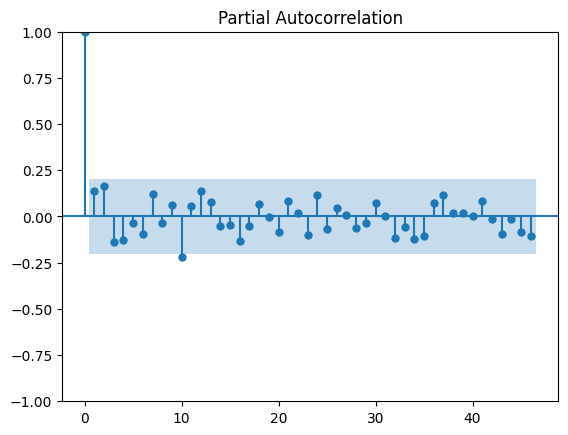

In [93]:
plot_pacf(repo['Average Frequency'], lags=46, method="ywm")  # 'ywm' is the default method
plt.show()